In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [9]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [10]:
# 整数转换为字词   
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
# 第一条影评 
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
# 将长度标准化，将整数转为张量
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [13]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0827 07:36:17.659148 140289779677056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0827 07:36:17.686664 140289779677056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

W0827 07:40:01.330985 140289779677056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 1s 76us/sample - loss: 0.6921 - acc: 0.5229 - val_loss: 0.6907 - val_acc: 0.5331
Epoch 2/100
15000/15000 [==============================] - 1s 61us/sample - loss: 0.6880 - acc: 0.5860 - val_loss: 0.6854 - val_acc: 0.6056
Epoch 3/100
15000/15000 [==============================] - 1s 58us/sample - loss: 0.6783 - acc: 0.6955 - val_loss: 0.6725 - val_acc: 0.7300
Epoch 4/100
15000/15000 [==============================] - 1s 58us/sample - loss: 0.6600 - acc: 0.7231 - val_loss: 0.6514 - val_acc: 0.7583
Epoch 5/100
15000/15000 [==============================] - 1s 58us/sample - loss: 0.6319 - acc: 0.7705 - val_loss: 0.6218 - val_acc: 0.7718
Epoch 6/100
15000/15000 [==============================] - 1s 59us/sample - loss: 0.5951 - acc: 0.8040 - val_loss: 0.5862 - val_acc: 0.7853
Epoch 7/100
15000/15000 [==============================] - 1s 57us/sample - loss: 0.5528 - acc: 0.8191 - val_l

### 评估模型   


In [15]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_loss, test_acc)

25000/25000 [==============================] - 1s 37us/sample - loss: 0.6122 - acc: 0.8514
0.6121781622624397 0.85136


In [17]:
# model.fit() 返回一个 History 对象，该对象包含一个字典，其中包括训练期间发生的所有情况：
his = history.history
his.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

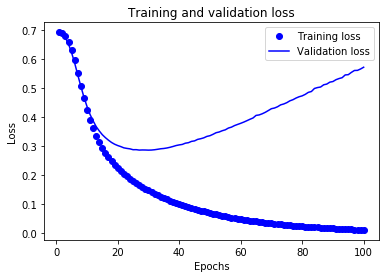

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# 加上图例
plt.legend()

plt.show()

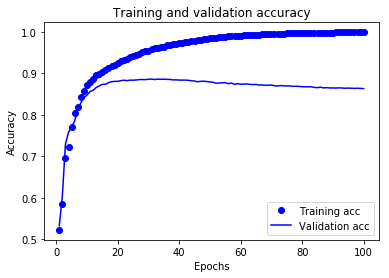

In [22]:
plt.clf()   # clear figure
acc_values = his['acc']
val_acc_values = his['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()